This is the section for the group project proposal for group 9!

Here is the link to the data set we will be using, Online News Populartiy from the UCI Machine Learning Resprotory.
Subsiquent sources can be found in the link on the UCI web page.
Link: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

Quesiton: Are we able to use previous articles to predict the number of shares an article recived.

In the cell below We will be importing all of the packages to help with our project!

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In the cell below, we will be reading our data into R.

In [2]:
getwd()

[1] "/home/jovyan/DCSI-100-Group-9-Project/project_proposal"

In [3]:
popularity<-read_csv("../data/OnlineNewsPopularity.csv")
head(popularity)

Rows: 39644 Columns: 61
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): url
dbl (60): timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, n_no...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,⋯,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,⋯,0.10000000,0.7,-0.3500000,-0.600,-0.2000000,0.5000000,-0.1875000,0.00000000,0.1875000,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,⋯,0.03333333,0.7,-0.1187500,-0.125,-0.1000000,0.0000000,0.0000000,0.50000000,0.0000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,⋯,0.10000000,1.0,-0.4666667,-0.800,-0.1333333,0.0000000,0.0000000,0.50000000,0.0000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.5037879,1,0.6656347,9,0,1,⋯,0.13636364,0.8,-0.3696970,-0.600,-0.1666667,0.0000000,0.0000000,0.50000000,0.0000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.4156456,1,0.5408895,19,19,20,⋯,0.03333333,1.0,-0.2201923,-0.500,-0.0500000,0.4545455,0.1363636,0.04545455,0.1363636,505
http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.5598886,1,0.6981982,2,2,0,⋯,0.13636364,0.6,-0.1950000,-0.400,-0.1000000,0.6428571,0.2142857,0.14285714,0.2142857,855


The next lines of Code will be used for wragling the data. I will be combining columns as well as removing extraneous columns I dont feel we need for this analysis. 

In [4]:

popularity_tidy <- popularity |> 
#removing columns that are specifically not litsted as predictors as well as columns that self reference articles.
select(-url, -timedelta , - num_self_hrefs, -self_reference_min_shares:-self_reference_avg_sharess,
      -is_weekend, -kw_min_min:-kw_avg_avg) |>

#The next line of code removes null values for day of the week.
#Since this data set makes each day boolean, we must check that each article 
#has been published on a day (i.e. one of the monday - sunday columns has a value 1 for each article)
#same is true for article type removing nulls.
filter(weekday_is_monday == 1| weekday_is_tuesday == 1| weekday_is_wednesday == 1| weekday_is_thursday == 1|
       weekday_is_friday == 1| weekday_is_saturday == 1| weekday_is_sunday == 1) |>

filter(data_channel_is_lifestyle == 1 | data_channel_is_entertainment == 1 | data_channel_is_bus == 1|
       data_channel_is_socmed == 1| data_channel_is_tech ==1 | data_channel_is_world == 1) |>

#Converts the days of the week and article type to factors from dbl
mutate(monday = as_factor(weekday_is_monday), tuesday = as_factor(weekday_is_tuesday), 
      wednesday = as_factor(weekday_is_wednesday) , thursday = as_factor(weekday_is_thursday),
      friday = as_factor(weekday_is_friday), saturday = as_factor(weekday_is_saturday),
       sunday = as_factor(weekday_is_sunday)) |>

mutate(lifestyle = as_factor(data_channel_is_lifestyle), 
       entertainment = as_factor(data_channel_is_entertainment), 
       bus = as_factor(data_channel_is_bus), 
       socmed = as_factor(data_channel_is_socmed), 
       tech = as_factor(data_channel_is_tech), 
       world = as_factor(data_channel_is_world)) |>

#combines the days of week and type data into their respective columns.
#pub_day is the day the article was published
pivot_longer(cols = lifestyle:world, 
             names_to = "article_type",
             values_to = "yes") |>
filter(yes == "1") |>

pivot_longer(cols = monday:sunday, 
             names_to = "pub_day",
             values_to = "yes_2") |>
filter(yes_2 == "1") |>

select(-yes,-yes_2 , -data_channel_is_lifestyle:-weekday_is_sunday)

#The new colums "article_type" and "pub_day" are the type of article and the day published respectivly 

In [8]:
#Splitting the data into training and testing data
#Strata = the day the article was published
popularity_split<- initial_split(popularity_tidy, prop = .75, strata = shares)
popularity_train<- training(popularity_split)
popularity_test <- testing(popularity_split)


In [6]:
#Initial exploration table
#Since there are 40+ columns I will only initially be viewing the ones I hyphtisize to have the most importance
initial_table <- popularity_train |> 
select(pub_day, shares, n_tokens_title, n_tokens_content, n_unique_tokens, num_hrefs, num_imgs, num_videos, article_type) |> 
group_by(article_type) |> 
summarize(avg_shares = mean(shares), 
          avg_tokens_title = mean(n_tokens_title),
          avg_tokens_content = mean(n_tokens_content),
          avg_unique_tokens = mean(n_unique_tokens),
          avg_hrefs = mean(num_hrefs),
          avg_imgs = mean(num_imgs),
          avg_videos = mean(num_videos))
initial_table

article_type,avg_shares,avg_tokens_title,avg_tokens_content,avg_unique_tokens,avg_hrefs,avg_imgs,avg_videos
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bus,2927.015,10.283015,541.7644,0.5462834,9.405196,1.792141,0.6639467
entertainment,2956.611,11.005049,608.9316,0.6627532,10.813201,6.466717,2.5716156
lifestyle,3862.101,9.759271,619.3966,0.5259184,13.340038,4.925204,0.4726587
socmed,3566.238,9.638262,625.0547,0.5336316,13.585779,4.397856,1.0863431
tech,3101.189,10.197844,574.4921,0.5303292,9.438436,4.520643,0.4528681
world,2280.560,10.614663,594.9192,0.5117249,10.198950,2.841285,0.5472328


Warning message:
“Removed 8041 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 12 rows containing missing values (geom_bar).”
Warning message:
“Removed 8041 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 14 rows containing missing values (geom_bar).”


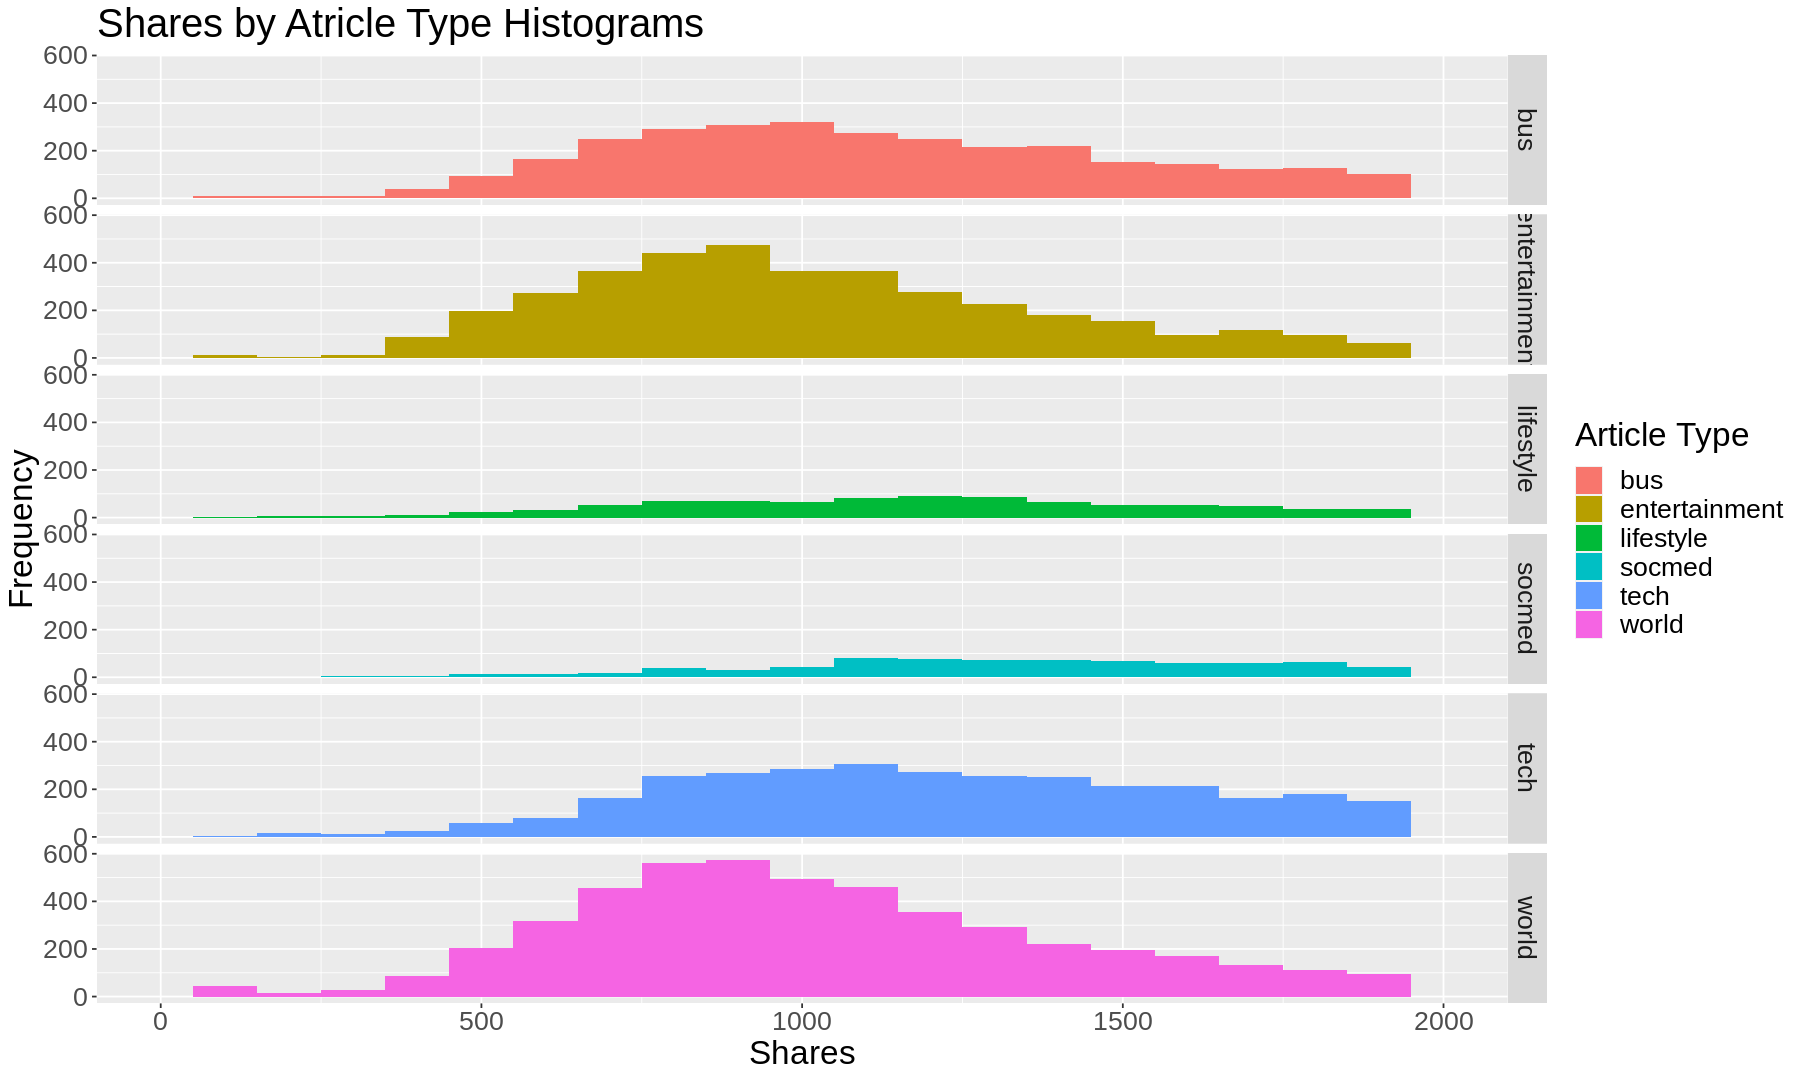

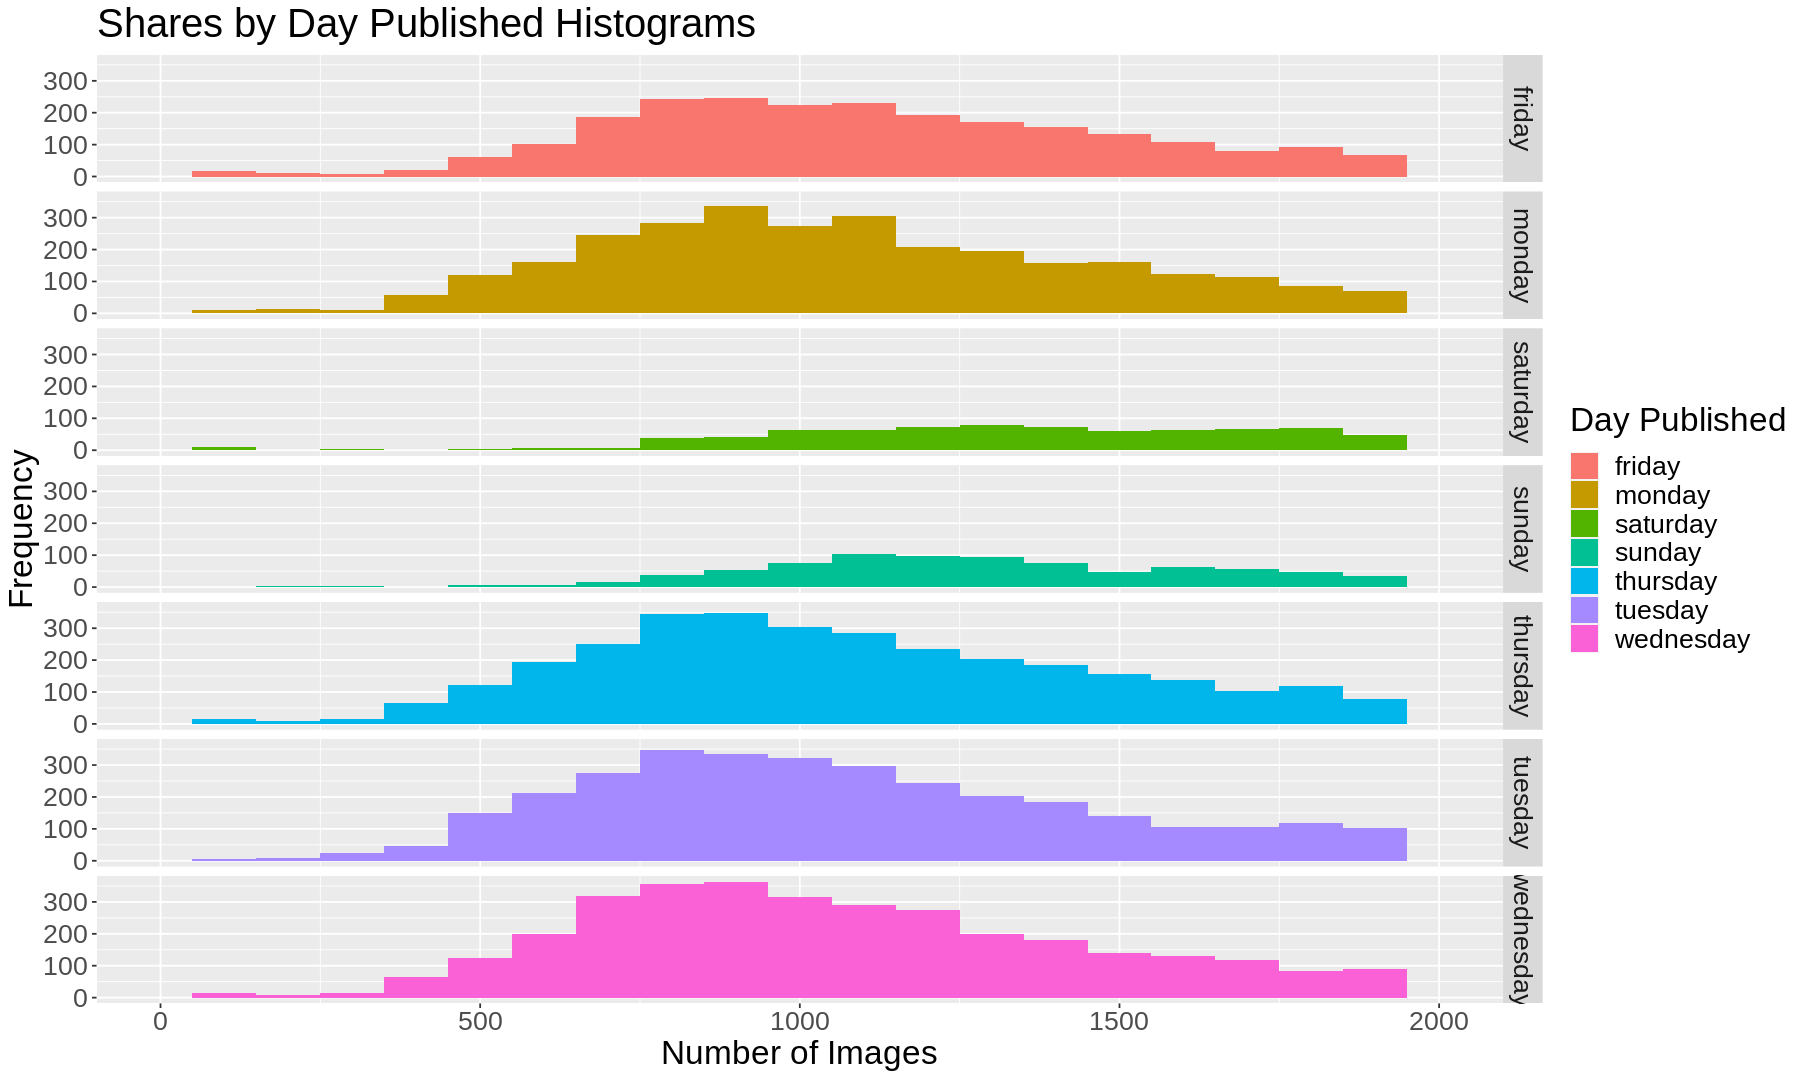

In [9]:
#I will be viewing the distribuition of shares separated by the 2 categorical variables, published day article type

options(repr.plot.width = 15, repr.plot.height =9)
shares_plot_type <- popularity_train |> 
ggplot(aes(x = shares, fill = article_type)) + geom_histogram(binwidth = 100) +
facet_grid(rows = vars(article_type)) + xlim(0,2000) +labs(fill = "Article Type", x = "Shares" , y = "Frequency") +
ggtitle("Shares by Atricle Type Histograms") + theme(text = element_text(size = 20))


shares_plot_day <- popularity_train |>
ggplot(aes(x = shares, fill = pub_day)) + geom_histogram(binwidth = 100) +
facet_grid(rows = vars(pub_day)) + xlim(0,2000) +labs(fill = "Day Published", x = "Number of Images" , y = "Frequency") +
ggtitle("Shares by Day Published Histograms") + theme(text = element_text(size = 20))

shares_plot_type
shares_plot_day